In [1]:
# Mukesh Rar- Task#3

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris= pd.read_csv("Iris.csv", header= 0)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.drop(['Id'], axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
print(iris.shape)

(150, 6)


In [7]:
print(iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


# 2-D scatter plot

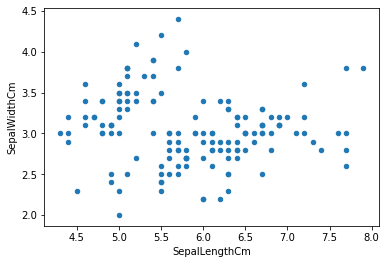

In [8]:
iris.plot(kind= 'scatter', x= 'SepalLengthCm', y= 'SepalWidthCm')
plt.show()

In [9]:
sns.set(style= 'whitegrid')

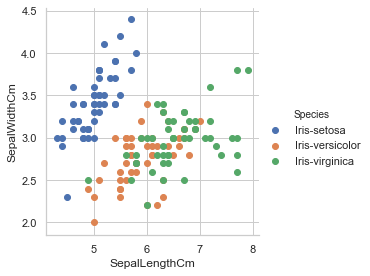

In [10]:
sns.FacetGrid(iris, hue= 'Species', height= 4).map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()
plt.show()

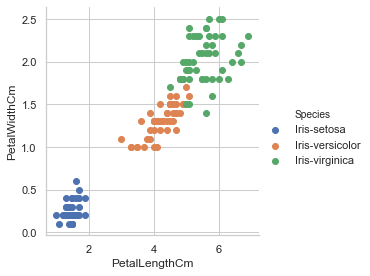

In [11]:
sns.FacetGrid(iris, hue= 'Species', height= 4).map(plt.scatter, 'PetalLengthCm', 'PetalWidthCm').add_legend()
plt.show()

- Notice that the blue points can be easily seperated 
- from red and green by drawing a line. 
- But red and green data points cannot be easily seperated.
- Can we draw multiple 2-D scatter plots for each combination of features?
- How many cobinations exist? 4C2 = 6.

**Observation(s):**
1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

# 3-D sctter plot:

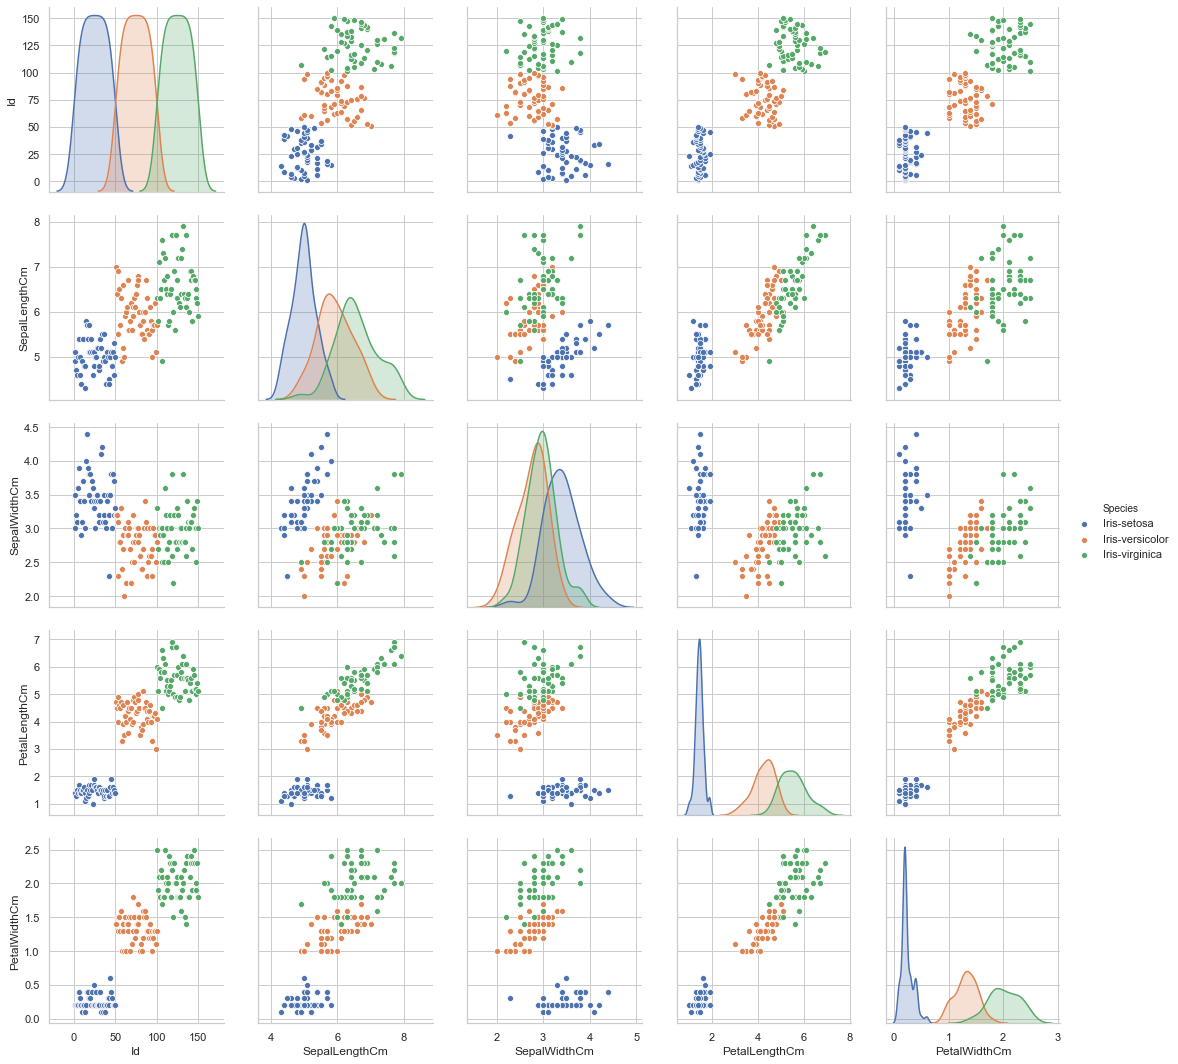

In [12]:
sns.pairplot(iris, hue= 'Species', height= 3)

- NOTE: the diagnol elements are PDFs for each feature.

**Observations**
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

In [13]:
X= iris.loc[:,iris.columns!='Species']
y= iris['Species']

# Training model

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)

from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
predictions= classifier.predict(X_test)

# Checking model accuracy

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00         6
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [17]:
print(confusion_matrix(y_test, predictions))

[[13  0  0]
 [ 0  6  0]
 [ 0  0 11]]


In [18]:
print(accuracy_score(y_test, predictions))

1.0


# Plotting of Decision tree

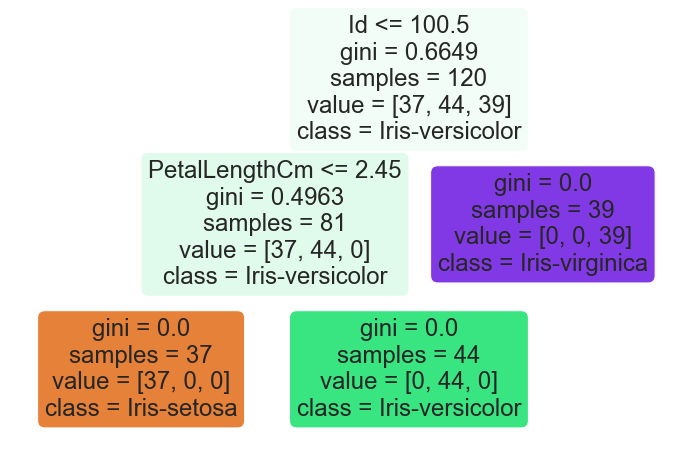

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
dtree= plot_tree(classifier, feature_names= iris.columns, class_names= iris['Species'].unique().tolist(), filled= True, precision= 4, rounded= True)